In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler #scaling de los datos entre 0 y 1
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [2]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [3]:
#cargo primero los datos
file_dir = 'Datos/RiesgoBuenosAires'
data = pd.read_csv(file_dir,sep=",",quotechar='"',na_values=[''])
data = data["incidenciaAcum14d"]
df = pd.DataFrame(data)
df = df.to_numpy()
df1 = np.copy(df) #el original
df = df[:-20] #saco los ultimos 20 dias (ult 10 para probar + ult 10 retrasados)
df1 = df1[:-10] #saco los ultimos 10 dias retrasados
#normalizacion
scaler = MinMaxScaler(feature_range=(0,1))
df += np.random.normal(0,0.01,df.shape)
df = scaler.fit_transform(df.reshape(-1,1))
#split en train y test
training_size=int(len(df)*0.8)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1] #train y test data
lag = 3 #creo que este es el que deducen en el paper
#creo los que vienen para la red
x_train, y_train = create_dataset(train_data, lag)
x_test, y_test = create_dataset(test_data, lag)

In [4]:
# reshape en (samples, time steps, features) para lstm como en pract7
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [43]:
model = keras.Sequential()
model.add(keras.layers.Bidirectional(keras.layers.LSTM(units=100,activation='relu',input_shape=(lag,1),recurrent_dropout=0.5)))
model.add(keras.layers.Dense(units=1))
model.compile(optimizer='adam',loss=keras.losses.MAE,metrics=['mae']) #metrics=['mean_absolute_percentage_error']
history = model.fit(x_train, y_train,epochs=200,validation_data=(x_test,y_test),batch_size=16,verbose=2)

Train on 232 samples, validate on 55 samples
Epoch 1/200
 - 1s - loss: 0.1523 - mae: 0.1523 - val_loss: 0.6579 - val_mae: 0.6579
Epoch 2/200
 - 0s - loss: 0.1066 - mae: 0.1066 - val_loss: 0.4048 - val_mae: 0.4048
Epoch 3/200
 - 0s - loss: 0.0462 - mae: 0.0462 - val_loss: 0.0409 - val_mae: 0.0409
Epoch 4/200
 - 0s - loss: 0.0231 - mae: 0.0231 - val_loss: 0.0353 - val_mae: 0.0353
Epoch 5/200
 - 0s - loss: 0.0148 - mae: 0.0148 - val_loss: 0.0128 - val_mae: 0.0128
Epoch 6/200
 - 0s - loss: 0.0106 - mae: 0.0106 - val_loss: 0.0194 - val_mae: 0.0194
Epoch 7/200
 - 0s - loss: 0.0109 - mae: 0.0109 - val_loss: 0.0305 - val_mae: 0.0305
Epoch 8/200
 - 0s - loss: 0.0082 - mae: 0.0082 - val_loss: 0.0193 - val_mae: 0.0193
Epoch 9/200
 - 0s - loss: 0.0093 - mae: 0.0093 - val_loss: 0.0278 - val_mae: 0.0278
Epoch 10/200
 - 0s - loss: 0.0092 - mae: 0.0092 - val_loss: 0.0301 - val_mae: 0.0301
Epoch 11/200
 - 0s - loss: 0.0060 - mae: 0.0060 - val_loss: 0.0227 - val_mae: 0.0227
Epoch 12/200
 - 0s - loss: 0.

Epoch 97/200
 - 0s - loss: 0.0035 - mae: 0.0035 - val_loss: 0.0311 - val_mae: 0.0311
Epoch 98/200
 - 0s - loss: 0.0043 - mae: 0.0043 - val_loss: 0.0287 - val_mae: 0.0287
Epoch 99/200
 - 0s - loss: 0.0040 - mae: 0.0040 - val_loss: 0.0319 - val_mae: 0.0319
Epoch 100/200
 - 0s - loss: 0.0036 - mae: 0.0036 - val_loss: 0.0152 - val_mae: 0.0152
Epoch 101/200
 - 0s - loss: 0.0038 - mae: 0.0038 - val_loss: 0.0190 - val_mae: 0.0190
Epoch 102/200
 - 0s - loss: 0.0046 - mae: 0.0046 - val_loss: 0.0295 - val_mae: 0.0295
Epoch 103/200
 - 0s - loss: 0.0047 - mae: 0.0047 - val_loss: 0.0268 - val_mae: 0.0268
Epoch 104/200
 - 0s - loss: 0.0031 - mae: 0.0031 - val_loss: 0.0207 - val_mae: 0.0207
Epoch 105/200
 - 0s - loss: 0.0035 - mae: 0.0035 - val_loss: 0.0153 - val_mae: 0.0153
Epoch 106/200
 - 0s - loss: 0.0050 - mae: 0.0050 - val_loss: 0.0198 - val_mae: 0.0198
Epoch 107/200
 - 0s - loss: 0.0048 - mae: 0.0048 - val_loss: 0.0186 - val_mae: 0.0186
Epoch 108/200
 - 0s - loss: 0.0060 - mae: 0.0060 - val_lo

Epoch 193/200
 - 0s - loss: 0.0041 - mae: 0.0041 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 194/200
 - 0s - loss: 0.0039 - mae: 0.0039 - val_loss: 0.0268 - val_mae: 0.0268
Epoch 195/200
 - 0s - loss: 0.0033 - mae: 0.0033 - val_loss: 0.0228 - val_mae: 0.0228
Epoch 196/200
 - 0s - loss: 0.0033 - mae: 0.0033 - val_loss: 0.0212 - val_mae: 0.0212
Epoch 197/200
 - 0s - loss: 0.0032 - mae: 0.0032 - val_loss: 0.0206 - val_mae: 0.0206
Epoch 198/200
 - 0s - loss: 0.0041 - mae: 0.0041 - val_loss: 0.0172 - val_mae: 0.0172
Epoch 199/200
 - 0s - loss: 0.0033 - mae: 0.0033 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 200/200
 - 0s - loss: 0.0031 - mae: 0.0031 - val_loss: 0.0176 - val_mae: 0.0176


In [44]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [45]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [46]:
print('train mse squared:',np.sqrt(mean_squared_error(y_train,train_predict))) 
print('test mse squared:',np.sqrt(mean_squared_error(y_test,test_predict))) 

train mse squared: 143.38479253151695
test mse squared: 386.7516369743289


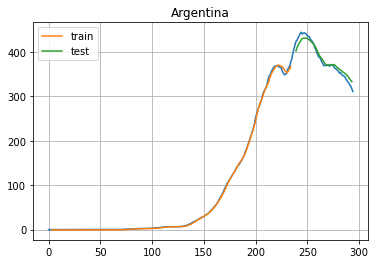

In [47]:
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lag:len(train_predict)+lag, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(lag*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot,label='train')
plt.plot(testPredictPlot,label='test')
plt.grid()
plt.title('Argentina')
plt.legend()
plt.show()

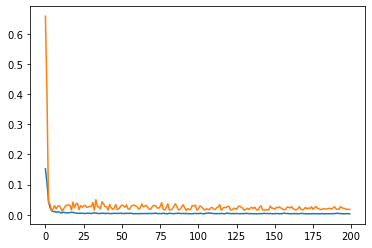

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [49]:
n = len(test_data)
x_input=test_data[n-lag:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
lst_output=[]
n_steps=lag
i=0

while(i<10): 
    if(len(temp_input)>lag):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, lag, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, lag,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1

1 day output [[0.7365446]]
2 day output [[0.74141014]]
3 day output [[0.7533087]]
4 day output [[0.7603308]]
5 day output [[0.7668357]]
6 day output [[0.7739514]]
7 day output [[0.7798863]]
8 day output [[0.78536534]]
9 day output [[0.7905781]]


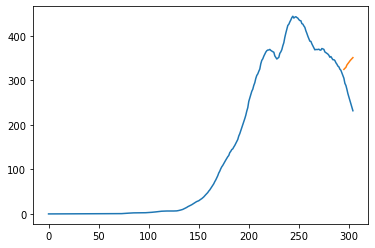

In [50]:
plt.plot(df1)
days = np.arange(len(df1))
dias_forecast = days[-10:]
plt.plot(dias_forecast,scaler.inverse_transform(lst_output))

(290.0, 310.0)

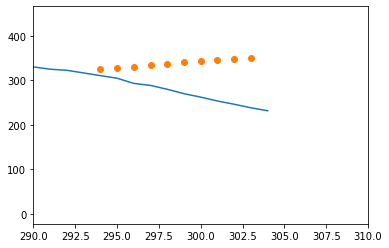

In [51]:
plt.plot(df1)
dias_forecast = np.arange(0,10) + len(df) - 1
plt.plot(dias_forecast,scaler.inverse_transform(lst_output),'o')
plt.xlim(290,310)

In [52]:
print(df1[-10:]-scaler.inverse_transform(lst_output))

[[ -19.81531187]
 [ -33.83679617]
 [ -40.55137425]
 [ -54.50932187]
 [ -67.45440789]
 [ -78.14042399]
 [ -89.96979245]
 [ -99.92964015]
 [-110.33135509]
 [-119.24097987]]
